In [1]:
import sys
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense
import keras_tuner
from tensorflow.keras.layers import PReLU

print("Successfully imported libraries!")

C:\Users\A_118784\Desktop\matura_github\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\A_118784\Desktop\matura_github\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\A_118784\Desktop\matura_github\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. P

Successfully imported libraries!


In [2]:
# List available GPUs
gpus = tf.config.list_physical_devices('GPU')
print("GPUs Available:", gpus)

# Check if TensorFlow will place operations on the GPU
print("TensorFlow Version:", tf.__version__)

# Run a quick test
with tf.device('/GPU:0'):
    a = tf.random.normal([1000, 1000])
    b = tf.random.normal([1000, 1000])
    c = tf.matmul(a, b)
    print("Test computation done on GPU")

GPUs Available: []
TensorFlow Version: 2.20.0-rc0
Test computation done on GPU


In [3]:
# Get the absolute path of the current script's directory
current_dir = os.path.dirname(os.path.abspath("transformer0.ipynb"))

# Get the absolute path of the parent directory (project_folder)
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to the Python path
sys.path.append(parent_dir)

# Now you can import from GetXY.py
from GetXY import x_train, y_train, x_val, y_val, early_stopping

# ... rest of your code
print("Successfully imported variables!")

1 - -2 - 2
2543
1.0

Expressions not in x:
-3 - -5 + 1
True
1457
3.0
15
-4.0
[-5.   1.   1.   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5]
Successfully imported variables!


In [4]:
#add a cls token at the beginning of x_train and x_val
pad_value = 15
x_train = np.pad(x_train, ((0, 0), (1, 0)), 'constant', constant_values=pad_value)
x_val = np.pad(x_val, ((0, 0), (1, 0)), 'constant', constant_values=pad_value)

In [5]:
def build_model(hp):
    model = tf.keras.Sequential()
    num_layers = hp.Int("layers", 1, 5)
    num_neurons = hp.Int("neurons", 5, 55, step = 5)
    for i in range(num_layers):
        model.add(Dense(num_neurons, kernel_initializer = "glorot_uniform", bias_initializer = "zeros"))
        model.add(PReLU())
    model.add(Dense(1, activation = "linear", kernel_initializer = "glorot_uniform", bias_initializer = "zeros"))
    model.compile(optimizer = "adam", loss = "mse")
    #default adam learningrate = 1e-3
    return model

In [6]:
build_model(keras_tuner.HyperParameters())

tuner = keras_tuner.BayesianOptimization(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory="FNN-keras-tunerResults",
    project_name="results",
)

batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(batch_size)

tuner.search(train_dataset, epochs = 100, validation_data = (val_dataset), callbacks = [early_stopping])

Trial 10 Complete [00h 00m 21s]
val_loss: 0.4545622169971466

Best val_loss So Far: 9.012174268718809e-05
Total elapsed time: 00h 03m 35s


In [7]:
best_model = tuner.get_best_models(num_models = 2)[1]
best_model.summary()


C:\Users\A_118784\Desktop\matura_github\myenv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\A_118784\Desktop\matura_github\myenv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu (PReLU)                      │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_1 (PReLU)                    │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ p_re_lu_2 (PReLU)                    │ (None, 10)                  │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431 (1.68 KB)

 Trainable params: 431 (1.68 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0448 - val_loss: 0.0015
Epoch 2/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7873e-04 - val_loss: 3.7367e-04
Epoch 3/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7997e-04 - val_loss: 4.0764e-04
Epoch 4/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5433e-04 - val_loss: 3.4028e-04
Epoch 5/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2299e-04 - val_loss: 5.5868e-04
Epoch 6/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3775e-04 - val_loss: 3.7461e-04
Epoch 7/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 4.4791e-04
Epoch 8/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1280e-04 - val_loss: 3.7179e-04
Epoch 9/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3365e-04 - val_loss: 8.9711e-04
Epoch 10/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3897e-04 - val_loss: 3.6901e-04
Epoch 11/200
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2877e-04 - val_loss

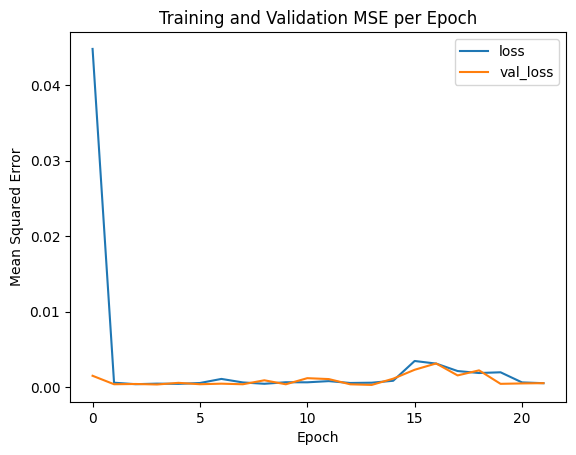

In [8]:
history = best_model.fit(
    train_dataset, # Pass the TensorFlow Dataset
    validation_data=val_dataset, # Pass the TensorFlow Dataset
    epochs=200,
    callbacks=[early_stopping],
)

import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation MSE per Epoch")
plt.show()

In [9]:
# 1. Take one batch from the dataset to inspect it or use it for prediction.
first_batch = val_dataset.take(1)

# To print the contents of that first batch, you can iterate over it.
# (Note: .take(1) creates a new dataset with only one element, so this loop will run once)
print("Contents of the first batch:")
for batch in first_batch:
    # A batch is typically a tuple of (inputs, labels)
    inputs, labels = batch
    print("Inputs shape:", inputs.shape)
    print("Labels shape:", labels.shape)
print(inputs[0])
# 2. Run prediction on that single batch.
# The model's predict method can directly accept the dataset object created by .take(1).
print("\nRunning prediction on the first batch...")
predictions = best_model.predict(first_batch)
print("Predictions shape:", predictions.shape)
print(predictions[0])
print("--------------")
print(predictions)

Contents of the first batch:
Inputs shape: (32, 16)
Labels shape: (32,)
tf.Tensor(
[15.   4.   1.   1.   0.   4.   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5], shape=(16,), dtype=float32)

Running prediction on the first batch...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predictions shape: (32, 1)
[0.9996674]
--------------
[[ 9.9966741e-01]
 [ 4.0104747e+00]
 [-9.9088240e-01]
 [ 6.0183454e+00]
 [-1.9999154e+00]
 [ 9.9844122e-01]
 [ 6.9995065e+00]
 [-1.2957187e+01]
 [-1.0002816e+00]
 [-4.0108714e+00]
 [-6.9935598e+00]
 [-1.6114742e-02]
 [-9.9824500e-01]
 [ 1.7481774e-02]
 [-2.9862404e+00]
 [-6.9910378e+00]
 [-2.0008144e+00]
 [ 5.9894543e+00]
 [ 1.0080096e+00]
 [-6.9974060e+00]
 [-2.9978623e+00]
 [-1.9869716e+00]
 [ 6.9899769e+00]
 [ 7.0080285e+00]
 [ 1.4066398e-03]
 [ 8.9987192e+00]
 [-1.9968417e+00]
 [-5.0018096e+00]
 [-6.9984684e+00]
 [ 2.0020843e+00]
 [ 4.0102601e+00]
 [ 9.9906273e+00]]
